   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

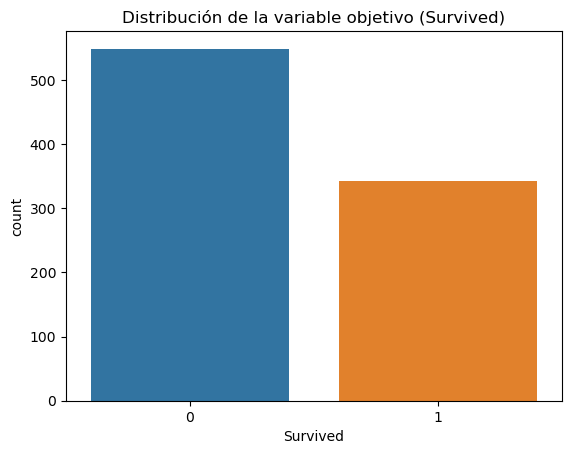

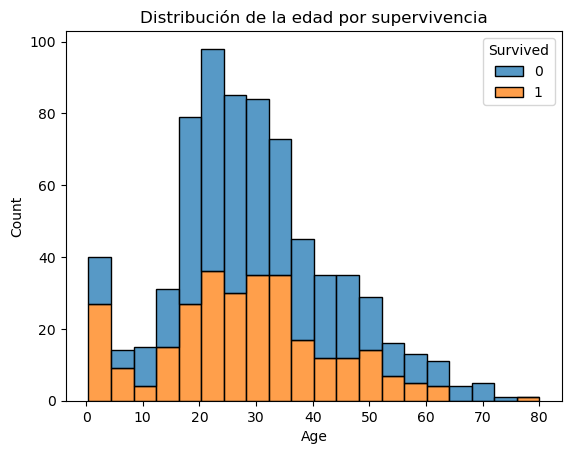

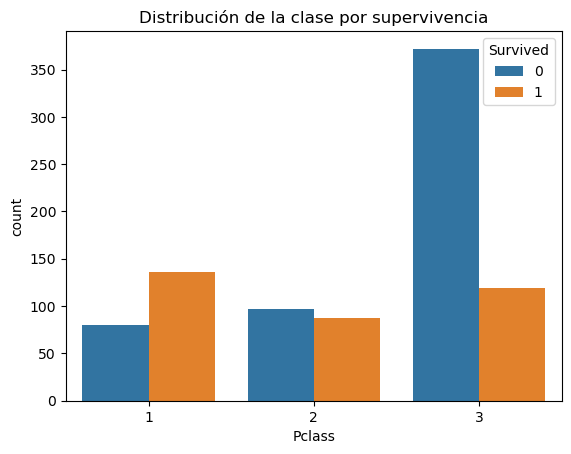

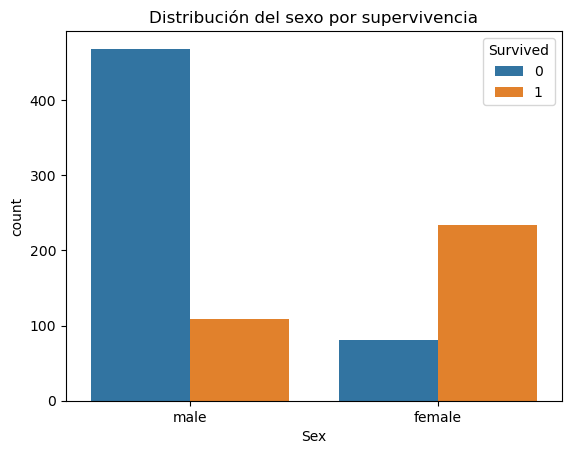

Age         177
Fare          0
Parch         0
SibSp         0
Pclass        0
Sex           0
Embarked      2
dtype: int64
Age         float64
Fare        float64
Parch         int64
SibSp         int64
Pclass        int64
Sex          object
Embarked     object
dtype: object
Validación cruzada Accuracy: 0.7907416527134836
Accuracy: 0.8044692737430168
Precision: 0.75
Recall: 0.7391304347826086
F1 Score: 0.7445255474452555


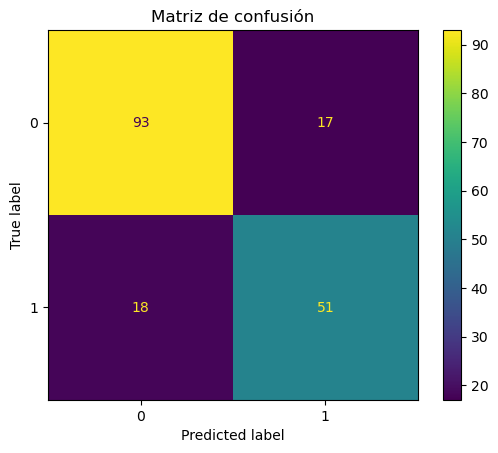

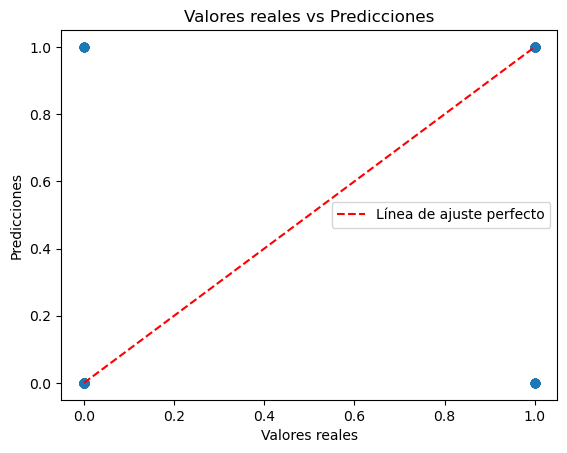

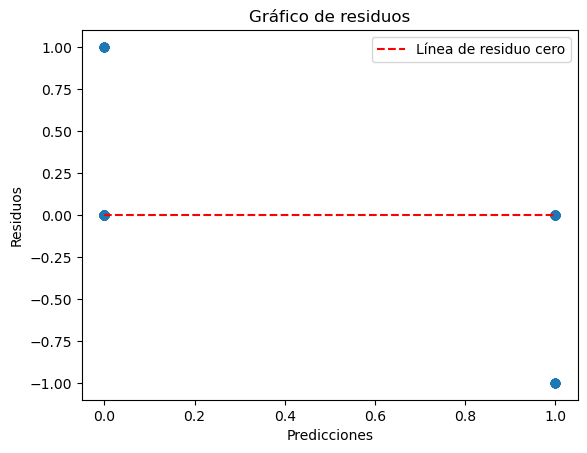

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Cargar el dataset Titanic
data1 = pd.read_csv('C:\\python\\Titanic-Dataset.csv')

# Mostrar las primeras filas del dataset
print(data1.head())

# Mostrar información general del dataset
print(data1.info())

# Resumen estadístico del dataset
print(data1.describe())

# Distribución de la variable objetivo 'Survived'
sns.countplot(x='Survived', data=data1)
plt.title('Distribución de la variable objetivo (Survived)')
plt.show()

# Relación entre variables y la supervivencia
sns.histplot(data=data1, x='Age', hue='Survived', multiple='stack')
plt.title('Distribución de la edad por supervivencia')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=data1)
plt.title('Distribución de la clase por supervivencia')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=data1)
plt.title('Distribución del sexo por supervivencia')
plt.show()

# Definir características numéricas y categóricas
numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
categorical_features = ['Pclass', 'Sex', 'Embarked']
target = 'Survived'

# Preprocesar las características numéricas y categóricas por separado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear el pipeline de regresión logística
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200))
])

# Seleccionar las características y el objetivo
X = data1[numeric_features + categorical_features]
y = data1[target]

# Verificar valores faltantes y tipos de datos
print(X.isnull().sum())
print(X.dtypes)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Realizar validación cruzada
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy = cv_scores.mean()

print(f'Validación cruzada Accuracy: {cv_accuracy}')

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Evaluar el modelo
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Matriz de confusión')
plt.show()

# Gráfico de valores reales vs predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Línea de ajuste perfecto')
plt.legend()
plt.show()

# Gráfico de residuos
residuos = y_test - y_pred
plt.scatter(y_pred, residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), linestyles='dashed', colors='red', label='Línea de residuo cero')
plt.legend()
plt.show()
